# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [ ]:
# Instalação de bibliotecas básicas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.patches import Patch
from requests import get
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup


## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [ ]:
# Responda aqui a primeira etapa

dataset_path = "/content/sample_data/matches.csv"
matches_df = pd.read_csv(dataset_path)

dataset_info = {
    "shape": matches_df.shape,
    "data_types": matches_df.dtypes,
    "missing_values": matches_df.isnull().sum(),
    "basic_stats": matches_df.describe(include='all')
}

dataset_info


{'shape': (1389, 28),
 'data_types': Unnamed: 0        int64
 date             object
 time             object
 comp             object
 round            object
 day              object
 venue            object
 result           object
 gf              float64
 ga              float64
 opponent         object
 xg              float64
 xga             float64
 poss            float64
 attendance      float64
 captain          object
 formation        object
 referee          object
 match report     object
 notes           float64
 sh              float64
 sot             float64
 dist            float64
 fk              float64
 pk              float64
 pkatt           float64
 season            int64
 team             object
 dtype: object,
 'missing_values': Unnamed: 0         0
 date               0
 time               0
 comp               0
 round              0
 day                0
 venue              0
 result             0
 gf                 0
 ga                 0
 opponent 

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

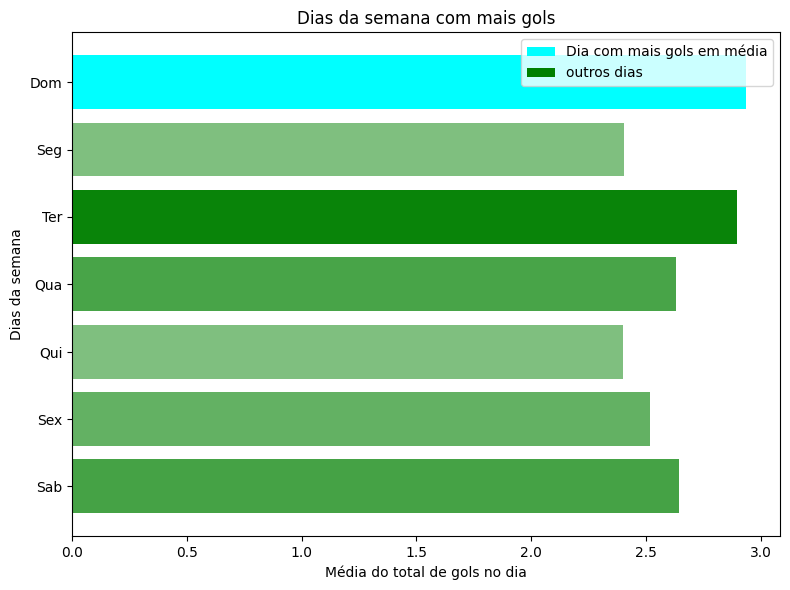

In [ ]:
# Responda aqui a etapa

# Calcula o total de gols (gf + ga) pra cada partida
matches_df['total_goals'] = matches_df['gf'] + matches_df['ga']

# Agrupa por dia e tira a média, para diminuir a discrepância entre finais de
# semana e dias úteis
avg_goals_per_day = matches_df \
                    .groupby('day')['total_goals'] \
                    .mean() \
                    .sort_values(ascending=False)

map = {
    'Sun': 'Dom',
    'Mon': 'Seg',
    'Tue': 'Ter',
    'Wed': 'Qua',
    'Thu': 'Qui',
    'Fri': 'Sex',
    'Sat': 'Sab'
}

for key, value in map.items():
    avg_goals_per_day[value] = avg_goals_per_day[key]
    del avg_goals_per_day[key]

days = list(map.values())

alpha_values = (avg_goals_per_day - avg_goals_per_day.min()) / (avg_goals_per_day.max() - avg_goals_per_day.min())
alpha_values_scaled = 0.5 + (alpha_values * 0.5)
max_day = avg_goals_per_day.idxmax()

fig, ax = plt.subplots(figsize=(8, 6))

for i, day in enumerate(days):
    color = 'cyan' if day == max_day else 'green'
    ax.barh(day, avg_goals_per_day[day], color=color, alpha=alpha_values_scaled[day])

ax.set_title('Dias da semana com mais gols')
ax.set_xlabel('Média do total de gols no dia')
ax.set_ylabel('Dias da semana')

ax.invert_yaxis()
plt.tight_layout()

legend_elements = [Patch(facecolor='cyan', label=f'Dia com mais gols em média'),
                   Patch(facecolor='green', label='outros dias')]

ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()

## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

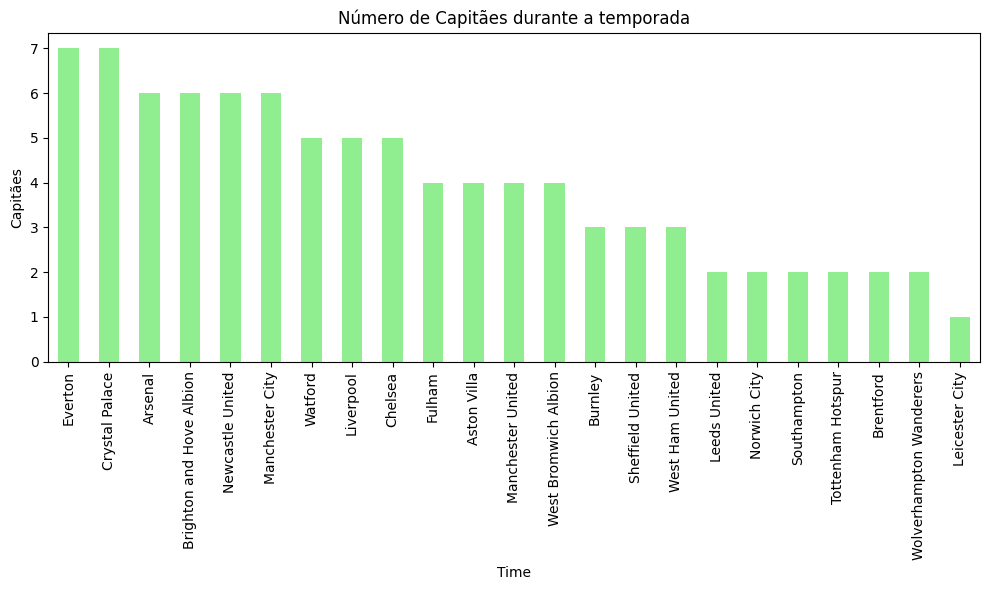

In [ ]:
# Responda a etapa aqui

unique_captains_per_team = matches_df.groupby('team')['captain'].nunique()

plt.figure(figsize=(10, 6))
unique_captains_per_team.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Número de Capitães durante a temporada')
plt.xlabel('Time')
plt.ylabel('Capitães')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

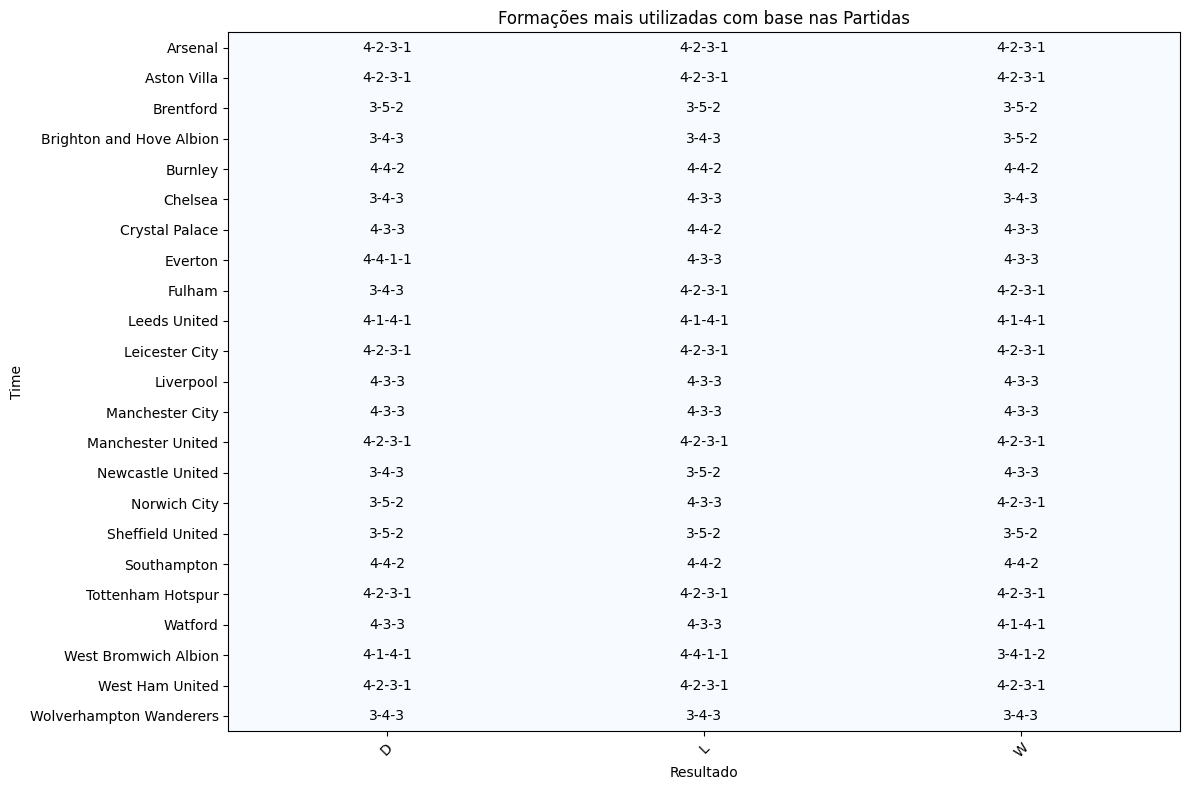

In [ ]:
# Responda a etapa aqui

common_formation = matches_df.groupby(['team', 'result', 'formation']).size().reset_index(name='count')

most_common_formation = common_formation.loc[common_formation.groupby(['team', 'result'])['count'].idxmax()]

most_common_formation_pivot = most_common_formation.pivot(index='team', columns='result', values='formation')

plt.figure(figsize=(12, 8))
plt.title('Formações mais utilizadas com base nas Partidas')
plt.xlabel('Resultado')
plt.ylabel('Time')

plt.imshow(most_common_formation_pivot.isnull(), cmap='Blues', interpolation='none', aspect='auto')

plt.xticks(range(len(most_common_formation_pivot.columns)), most_common_formation_pivot.columns, rotation=45)
plt.yticks(range(len(most_common_formation_pivot.index)), most_common_formation_pivot.index)

for i in range(len(most_common_formation_pivot.index)):
    for j in range(len(most_common_formation_pivot.columns)):
        formation = most_common_formation_pivot.iloc[i, j]
        if formation:
            plt.text(j, i, formation, ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

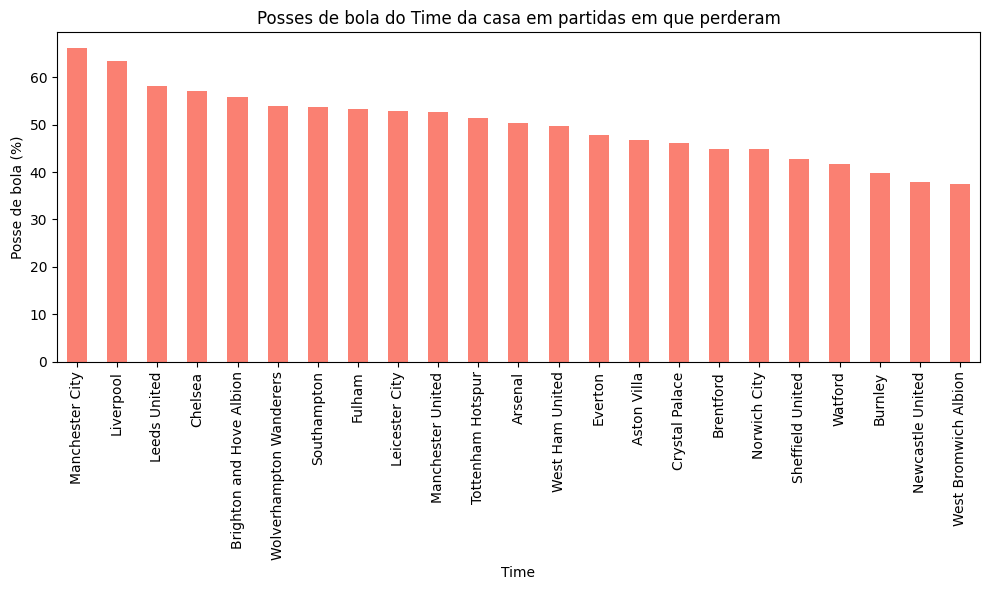

In [ ]:
# Responda aqui a etapa

home_losses_possession = matches_df[(matches_df['venue'] == 'Home') & (matches_df['result'] == 'L')]

# Group by team and calculate the average possession for each team
avg_possession_losses_home = home_losses_possession.groupby('team')['poss'].mean().sort_values(ascending=False)

# Plot the average possession for all teams when they lost at home
plt.figure(figsize=(10, 6))
avg_possession_losses_home.plot(kind='bar', color='salmon')
plt.title('Posses de bola do Time da casa em partidas em que perderam')
plt.xlabel('Time')
plt.ylabel('Posse de bola (%)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [ ]:
# Responda a etapa aqui

data_cleaned = matches_df.dropna(subset=['gf', 'ga', 'sh', 'sot'])

data_cleaned['points'] = data_cleaned['result'].apply(lambda x: 3 if x == 'W' else (1 if x == 'D' else 0))

team_points = data_cleaned.groupby('team')['points'].sum().reset_index()
team_points = team_points.sort_values(by='points', ascending=False).reset_index(drop=True)

def get_team_logo(team_name):
    # Converte o nome da equipe para o padrão da URL
    formatted_team_name = team_name.lower().replace(' ', '-') + '-football-club.png'
    search_url = f'https://logodetimes.com/wp-content/uploads/{formatted_team_name}'
    response = get(search_url)
    if response.status_code == 200:
        return search_url
    return None

team_points['logo'] = team_points['team'].apply(get_team_logo)

fig = go.Figure(data=[go.Table(
    header=dict(values=['Posição', 'Brasão', 'Equipe', 'Pontos'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[team_points.index + 1, team_points['logo'], team_points['team'], team_points['points']],
               fill_color='lavender',
               align='left',
               format=["", "<img src='{}'>", "", ""],
               height=30))
])

fig.update_layout(title="Classificação Final do Campeonato")
fig.show()

## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [ ]:
data_cleaned = matches_df.dropna(subset=['attendance'])
total_attendance_per_team = data_cleaned.groupby('team')['attendance'].sum().reset_index()
team_names = total_attendance_per_team['team'].unique()


def update_game_detail(team_name):
    team_games = get_team_games(team_name)
    fig_combined.data[1].x = team_games['date']
    fig_combined.data[1].y = team_games['attendance']
    fig_combined.data[1].name = f'Público por Jogo - {team_name}'
    fig_combined.layout.annotations[1].text = f'Público por Jogo - {team_name}'


def get_team_games(team_name):
    return data_cleaned[data_cleaned['team'] == team_name]


team_name_initial = total_attendance_per_team['team'].iloc[0]
team_games = get_team_games(team_name_initial)




fig_total_attendance = px.bar(total_attendance_per_team,
                              x='team',
                              y='attendance',
                              title='Público Total por Equipe',
                              labels={'team': 'Equipe', 'attendance': 'Público Total'})

fig_team_games = px.bar(team_games,
                        x='date',
                        y='attendance',
                        title=f'Público por Jogo - {team_name_initial}',
                        labels={'date': 'Data do Jogo', 'attendance': 'Público'})

fig_combined = make_subplots(rows=2, cols=1,
                             subplot_titles=('Público Total por Equipe', f'Público por Jogo - {team_name_initial}'))

fig_combined.add_trace(go.Bar(x=total_attendance_per_team['team'],
                              y=total_attendance_per_team['attendance'],
                              name='Público Total por Equipe'), row=1, col=1)

fig_combined.add_trace(go.Bar(x=team_games['date'],
                              y=team_games['attendance'],
                              name=f'Público por Jogo - {team_name_initial}'), row=2, col=1)

dropdown_buttons = []
for team in team_names:
    dropdown_buttons.append(dict(method='restyle',
                                 label=team,
                                 args=[{'x': [get_team_games(team)['date']],
                                        'y': [get_team_games(team)['attendance']],
                                        'name': f'Público por Jogo - {team}'},
                                       [1]]))

fig_combined.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.15,
        'yanchor': 'top',
    }],
    height=700
)

fig_combined.show()